In [1]:
##%matplotlib widget
## with %matplotlib notebook: seems to require ipympl as part of environment, either
## part of the conda environment or "pip install ipympl"
## otherwise, does not show ANY plots in notebook, plt.savefig() works
%matplotlib notebook  
##%matplotlib inline    ## --plt.savefig()  works, but re-sizing does NOT


Check the current GPU usage. Please try to be nice!

> **WARNING**: The card numbers here are *not* the same as in CUDA. You have been warned.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
import pandas as pd

# Python 3 standard library
from pathlib import Path

from torchsummary import summary

### Set up local parameters

Make the output directory if it does not exist:

## Get the helper functions

Add the directory with the model
definitions to the path so we can import from it:

> When you type `import X`,
Python searches `sys.path` for a python
file named `X.py` to import. So we need to add the model directory to the path.

In [3]:
# From model/collectdata.py
from model.collectdata_poca_KDE import collect_data, read_data

# From model/loss.py
##from loss import Loss
from model.alt_loss_A import Loss

# From model/training.py
from model.training import trainNet, select_gpu

# From model/models.py
##  will start with model from TwoFeatures_CNN6Layer_A in the first instance
##  see relevant cell below


from model.models_mds_01June20 import SimpleCNN5Layer_Ca as Model

from model.training import trainNet, select_gpu, Results
from model.plots import dual_train_plots, replace_in_ax

In [4]:
##X_A, X_B, kernel, xMax, yMax = read_data('dataAA/100_POCA_kernel_val_A.h5',
##                             masking=True)

## this input file uses probabilities accounting for sqrt(determinant) in the denominator
X_A, X_B, kernel, xMax, yMax = read_data('dataAA/100_POCA_kernel_evts_200926.h5',
                             masking=True)
                           

Loading data...
Loaded dataAA/100_POCA_kernel_evts_200926.h5 in 0.03382 s


X_A,shape =  (100, 1, 4000)
len(X_A) =  100
np.max(kde_A) =  10.5078125 np.max(kde_B) =  196.25 np.max(old_kde) =  31.890625
scaled ratio = 0.988 


<IPython.core.display.Javascript object>


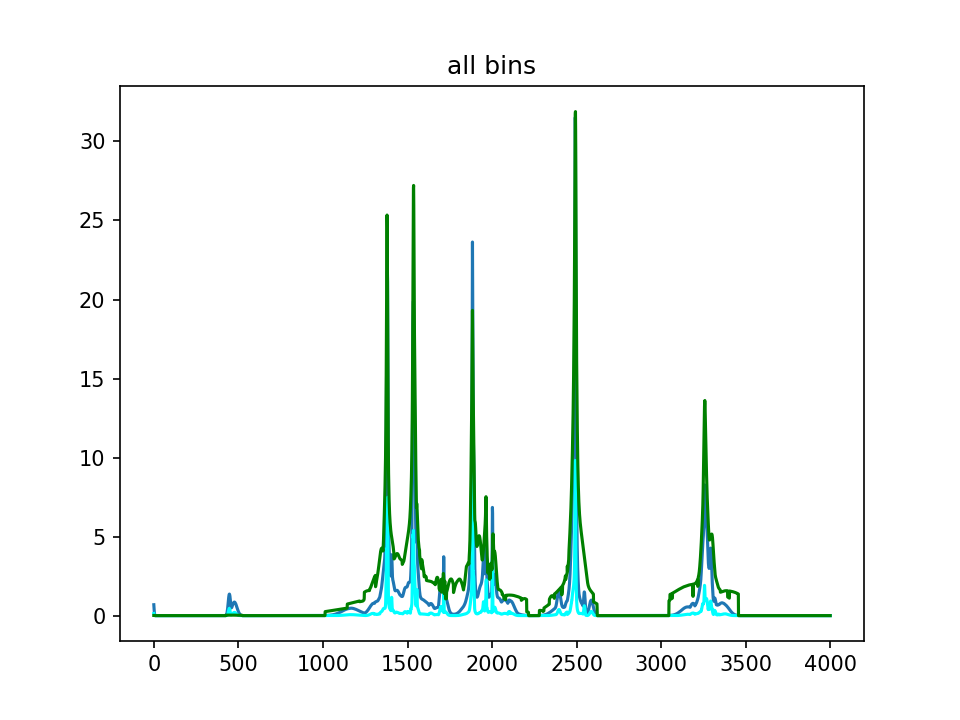

<IPython.core.display.Javascript object>


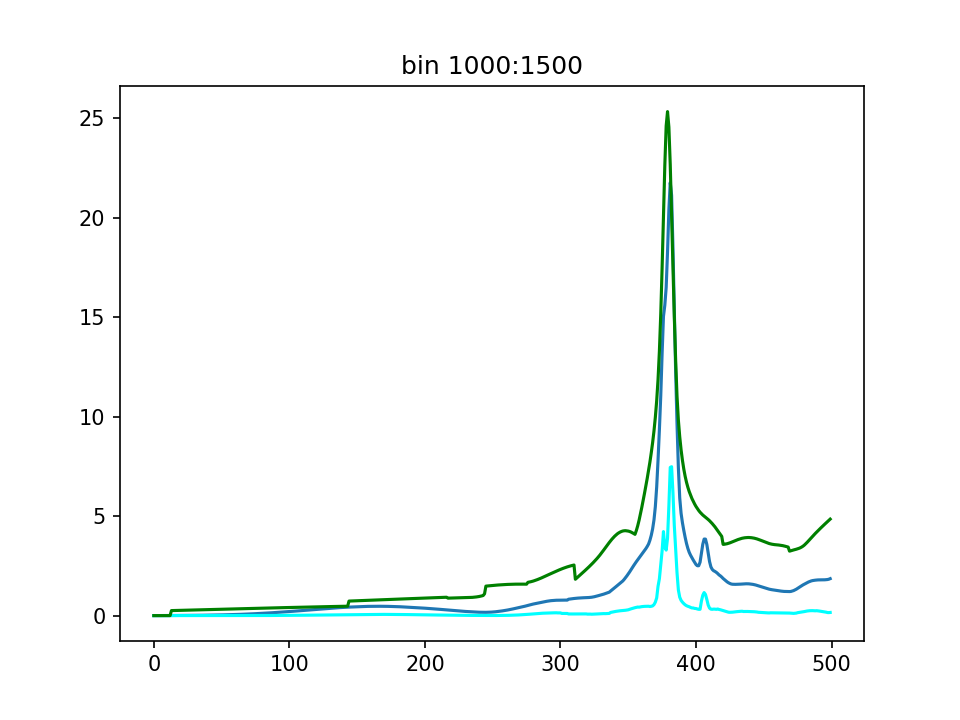

<IPython.core.display.Javascript object>


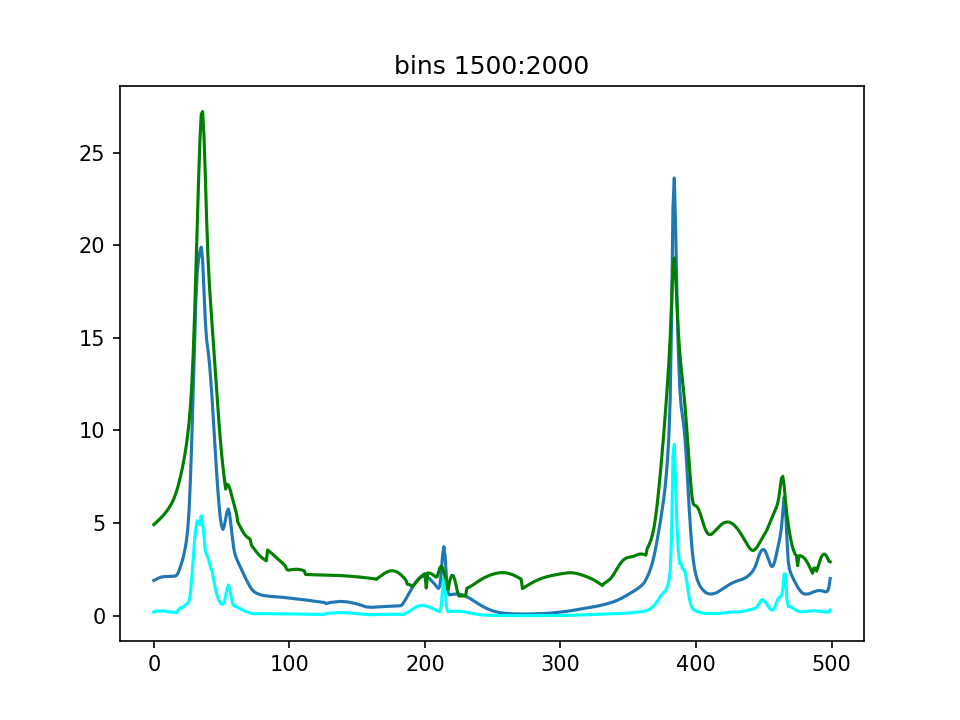

np.max(kde_A) =  13.4140625 np.max(kde_B) =  273.25 np.max(old_kde) =  31.703125
scaled ratio = 1.269 


<IPython.core.display.Javascript object>


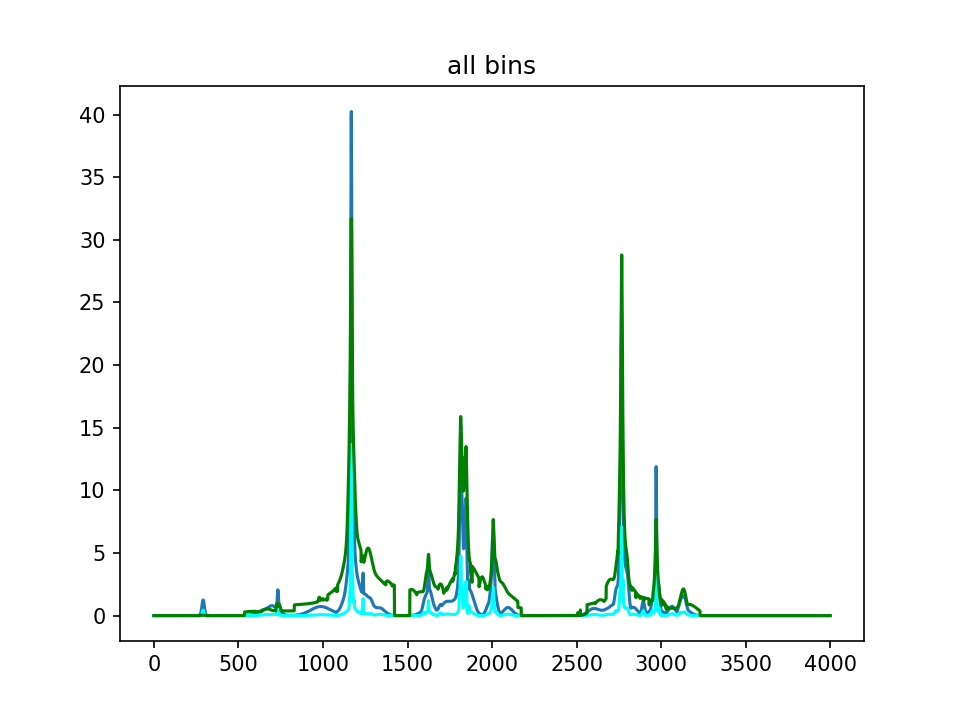

<IPython.core.display.Javascript object>


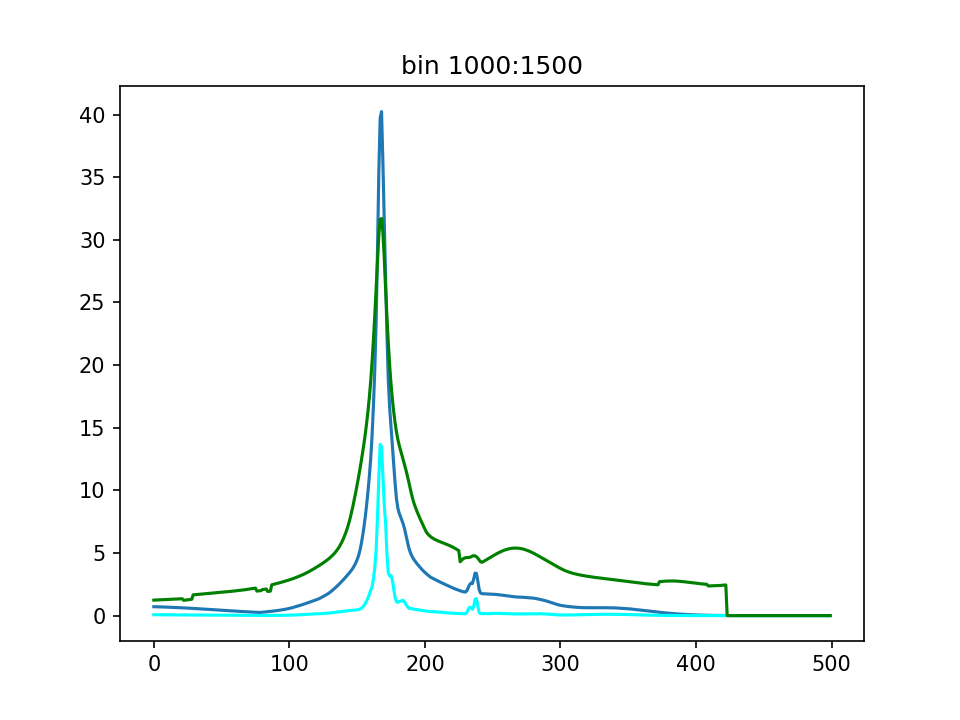

<IPython.core.display.Javascript object>


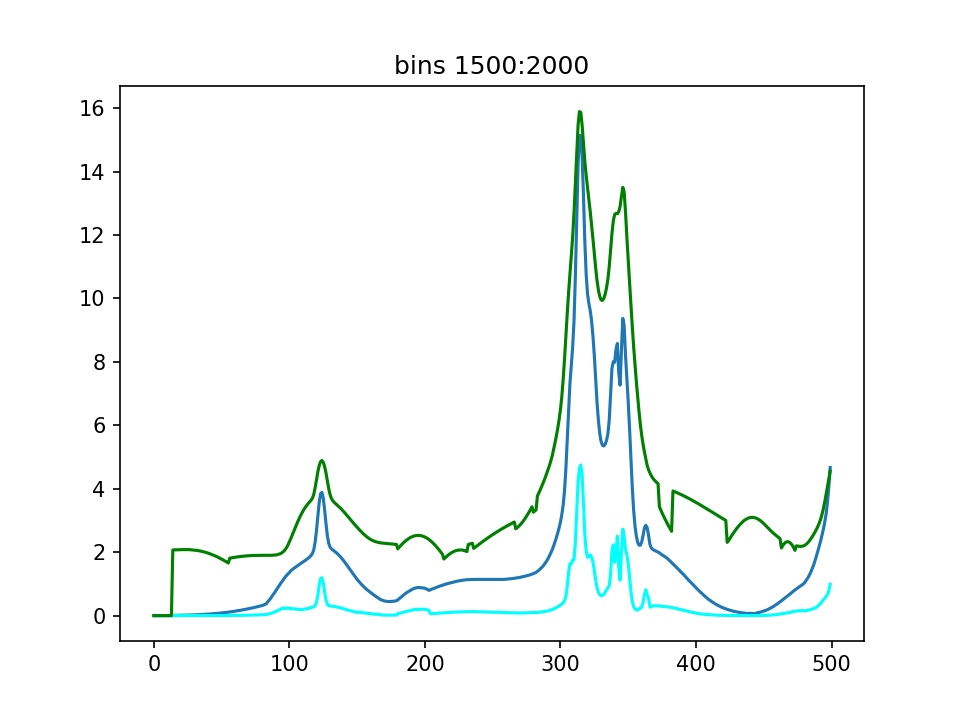

np.max(kde_A) =  13.5078125 np.max(kde_B) =  266.0 np.max(old_kde) =  41.03125
scaled ratio = 0.988 


<IPython.core.display.Javascript object>


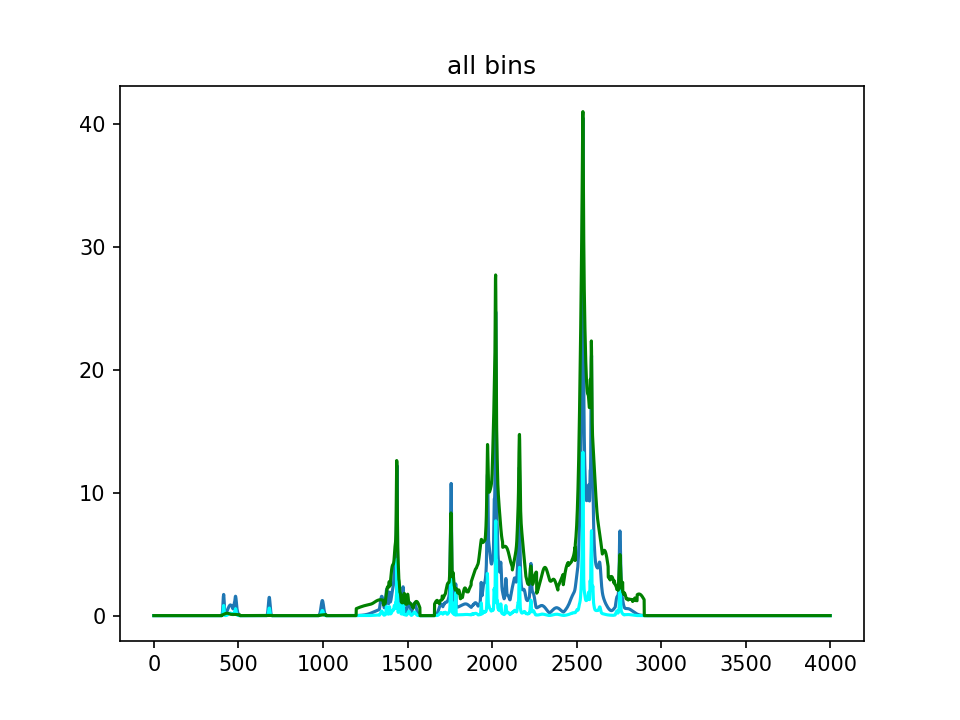

<IPython.core.display.Javascript object>


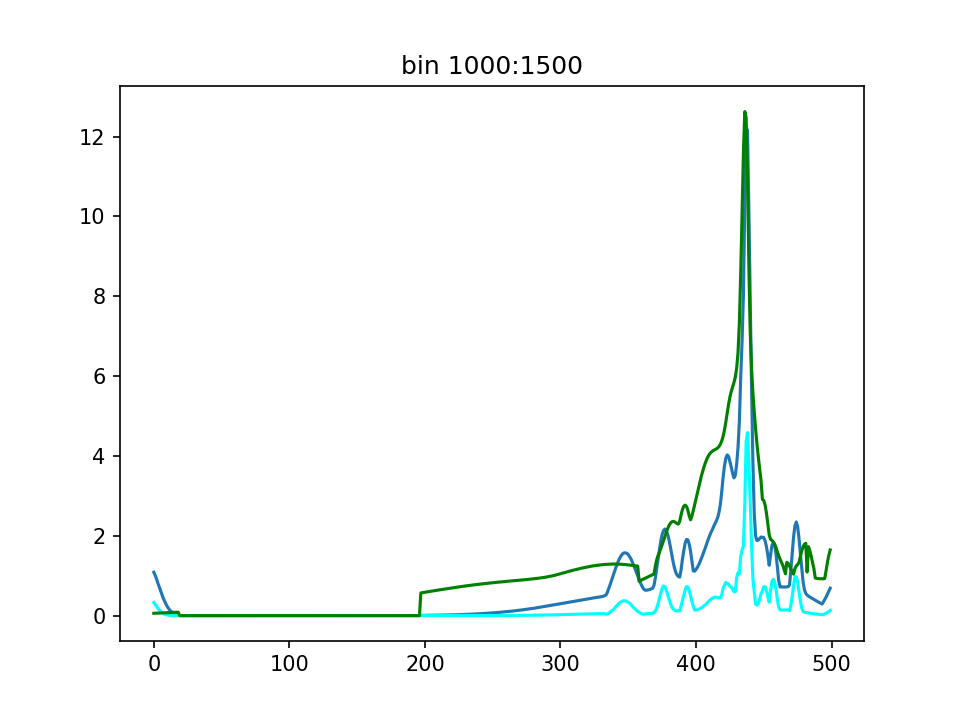

<IPython.core.display.Javascript object>


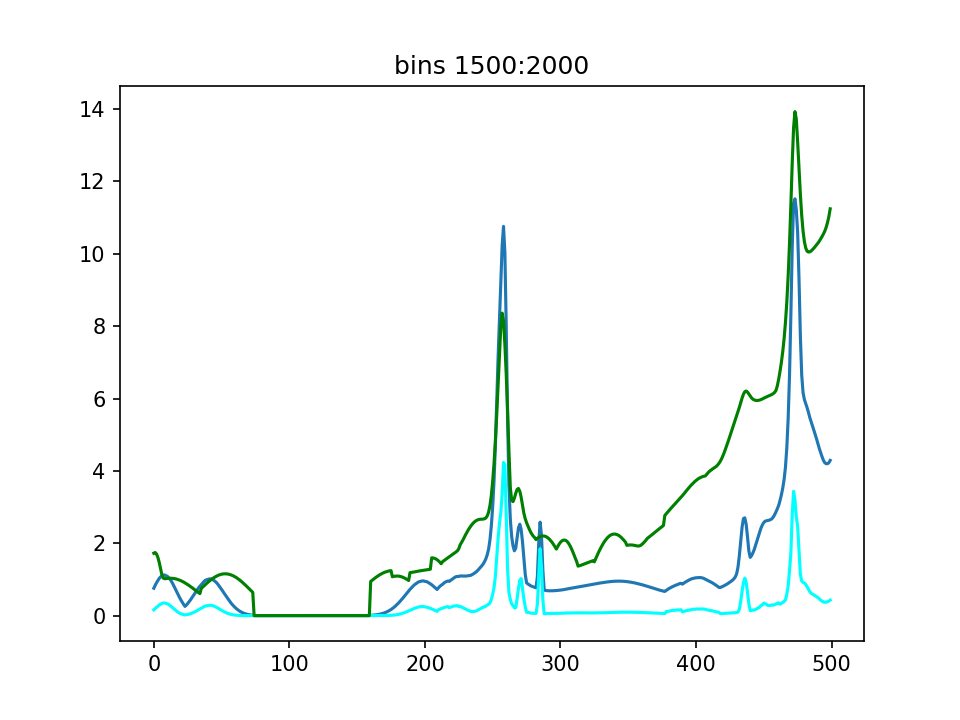

np.max(kde_A) =  7.1523438 np.max(kde_B) =  112.5 np.max(old_kde) =  28.890625
scaled ratio = 0.743 


<IPython.core.display.Javascript object>


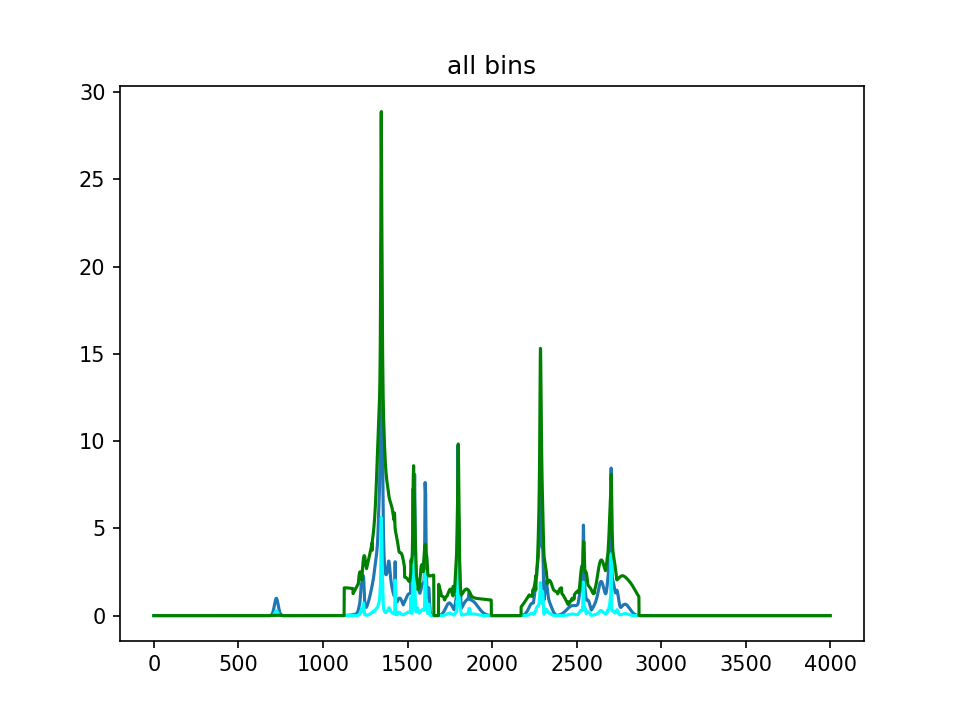

<IPython.core.display.Javascript object>


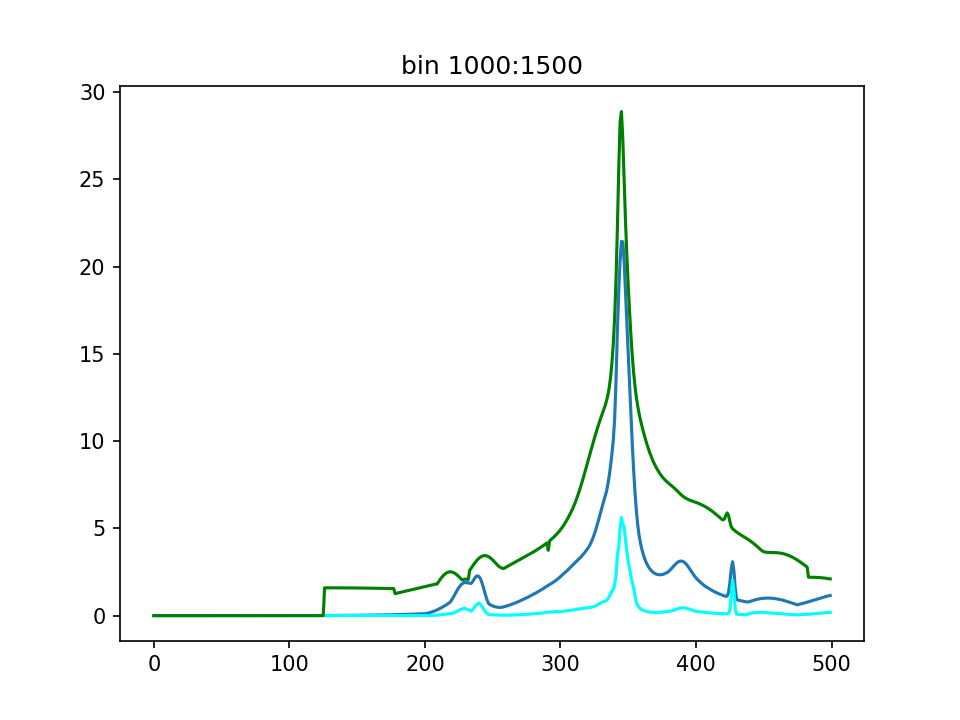

<IPython.core.display.Javascript object>


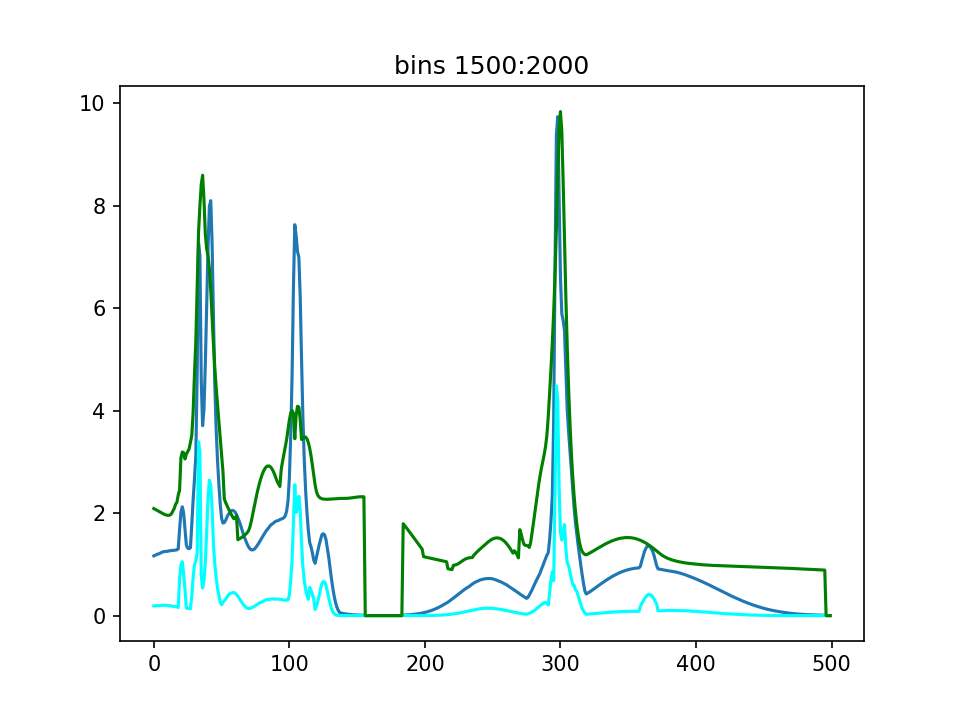

np.max(kde_A) =  17.234375 np.max(kde_B) =  345.25 np.max(old_kde) =  46.84375
scaled ratio = 1.104 


<IPython.core.display.Javascript object>


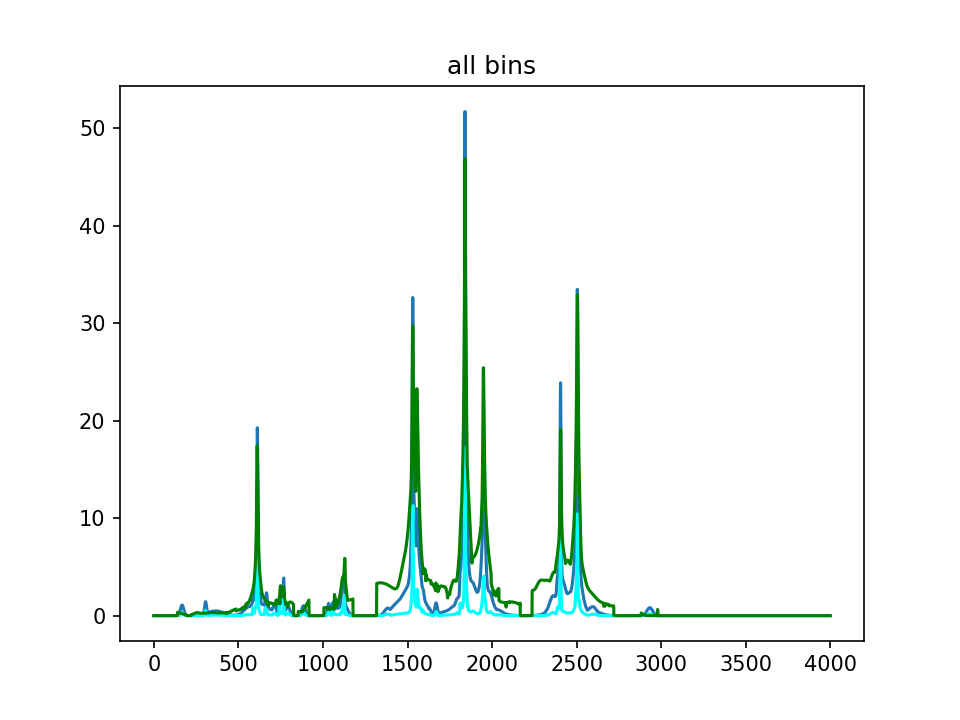

<IPython.core.display.Javascript object>


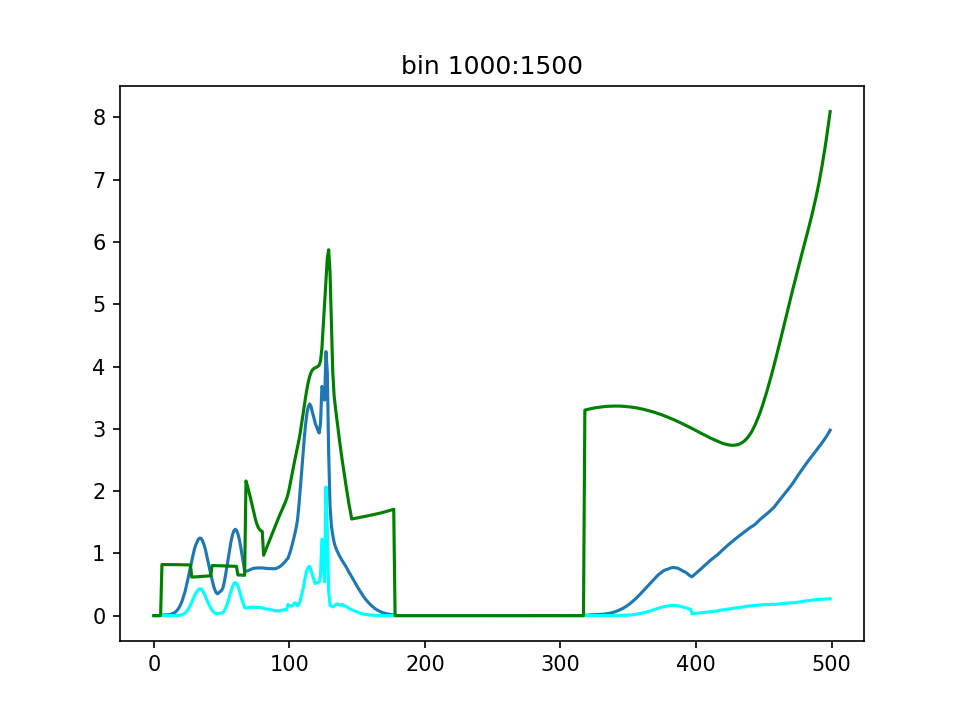

<IPython.core.display.Javascript object>


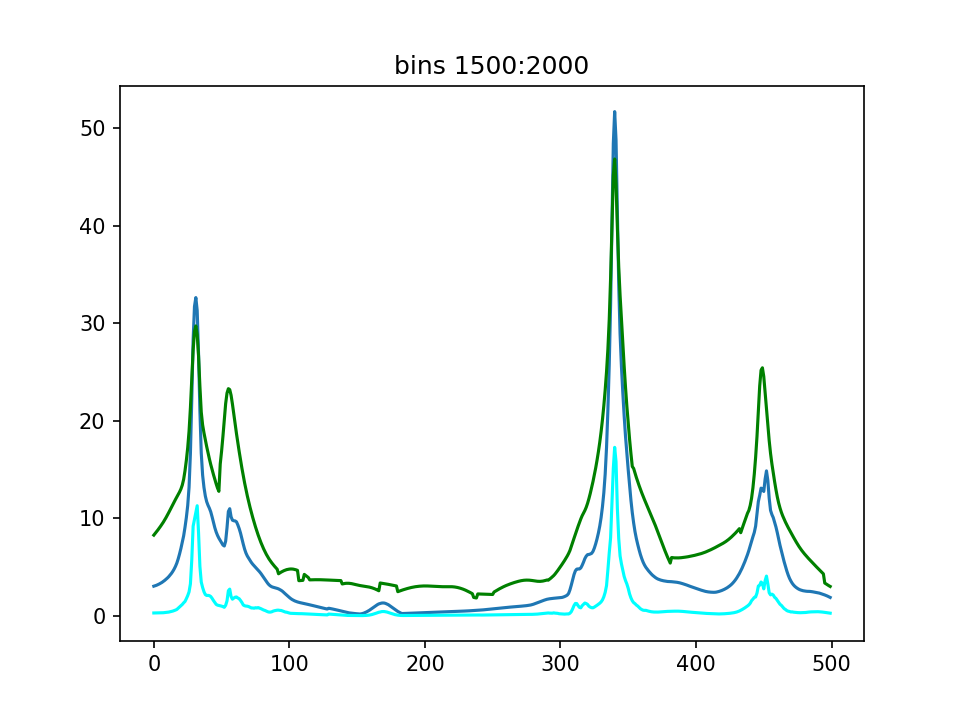

np.max(kde_A) =  12.8203125 np.max(kde_B) =  306.75 np.max(old_kde) =  36.59375
scaled ratio = 1.051 


<IPython.core.display.Javascript object>


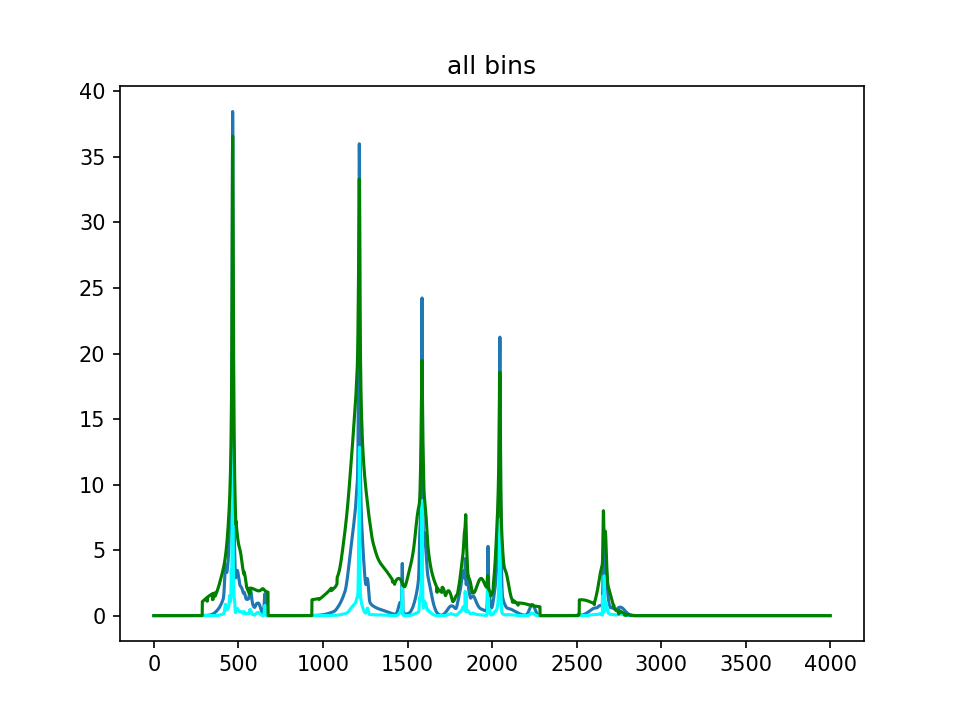

<IPython.core.display.Javascript object>


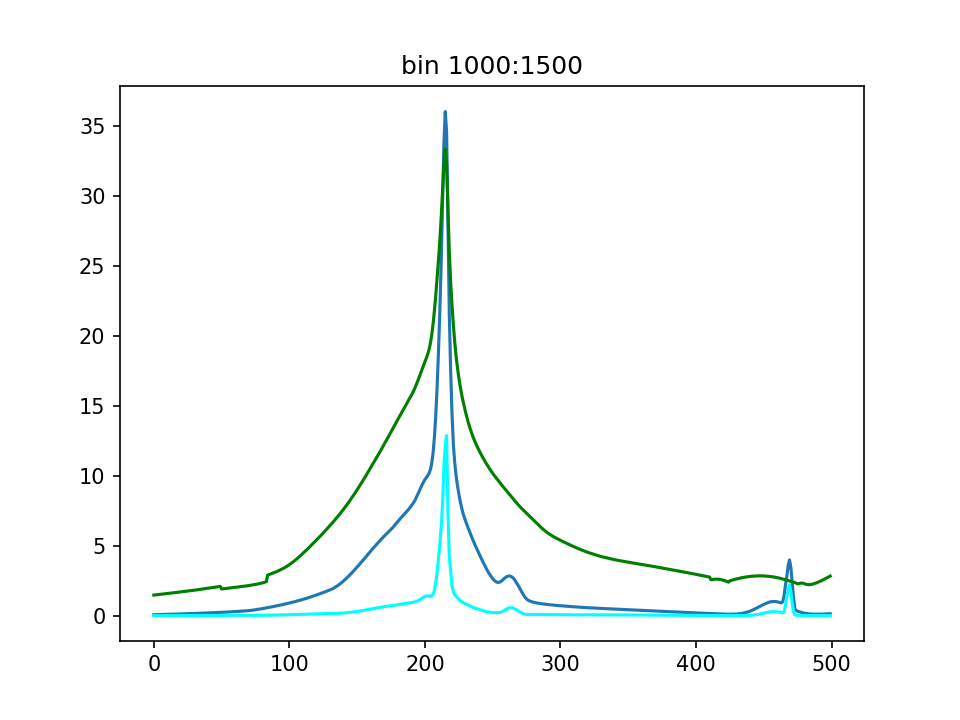

<IPython.core.display.Javascript object>


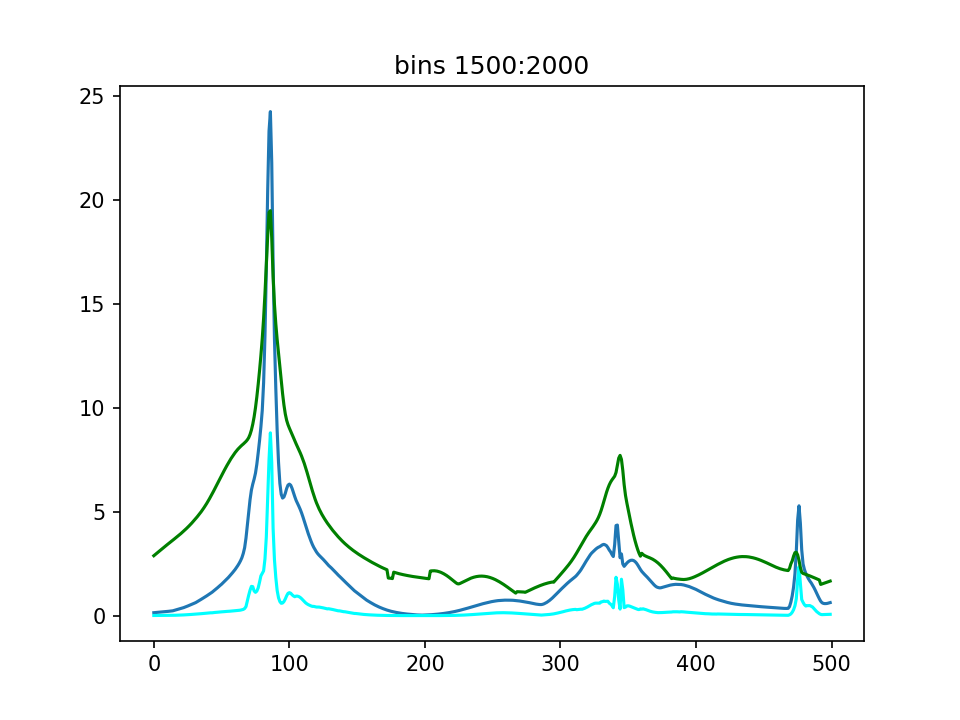

np.max(kde_A) =  6.421875 np.max(kde_B) =  158.25 np.max(old_kde) =  17.78125
scaled ratio = 1.083 


<IPython.core.display.Javascript object>


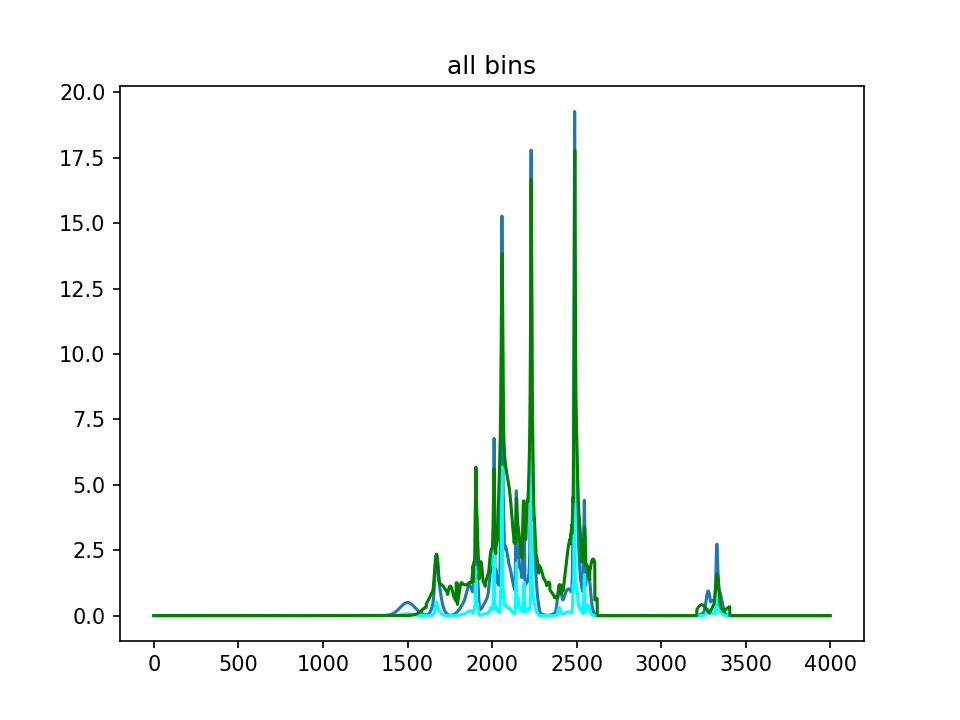

<IPython.core.display.Javascript object>


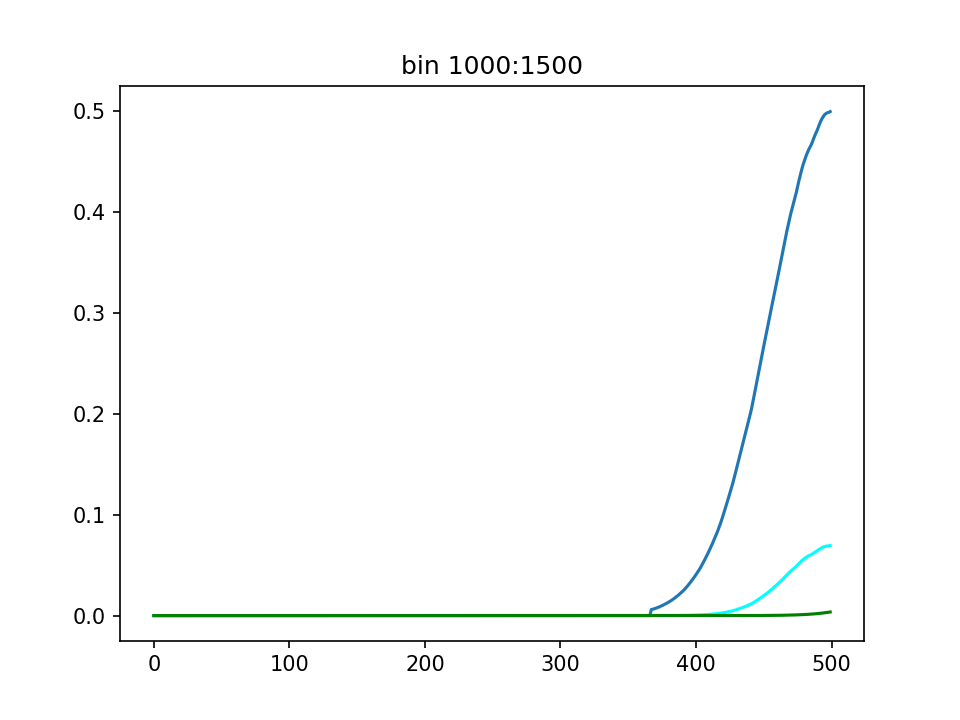

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


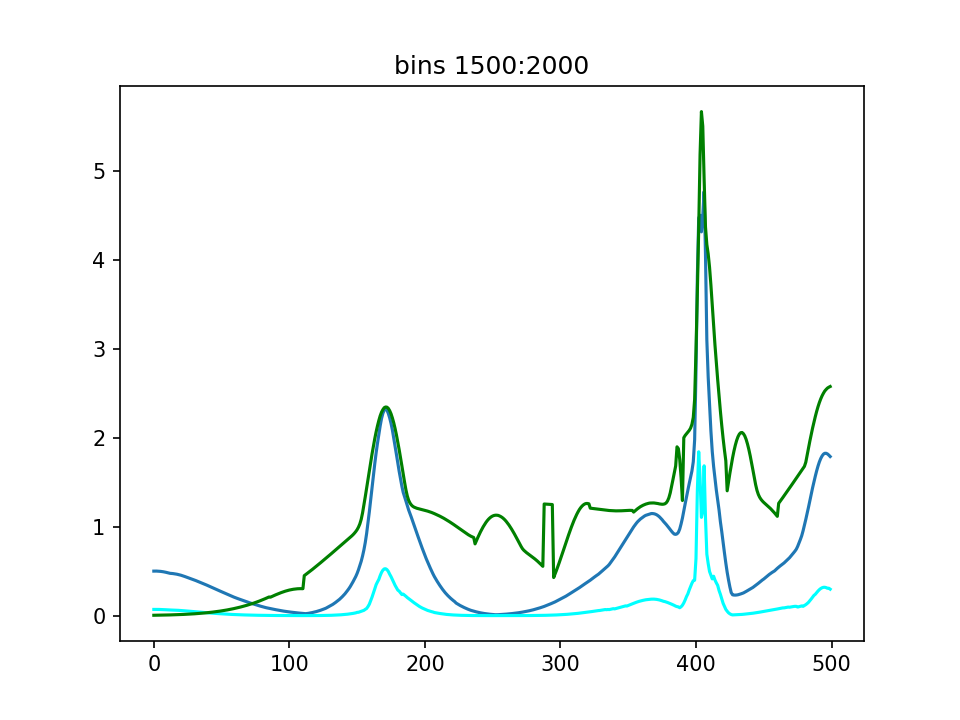

np.max(kde_A) =  12.078125 np.max(kde_B) =  208.25 np.max(old_kde) =  46.125
scaled ratio = 0.786 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


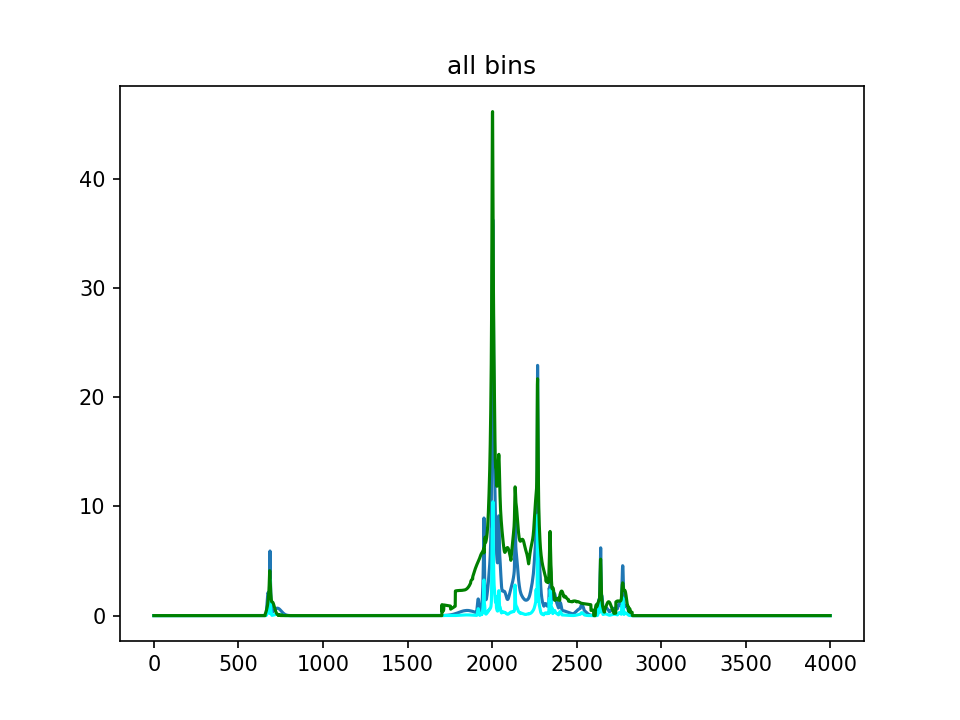

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


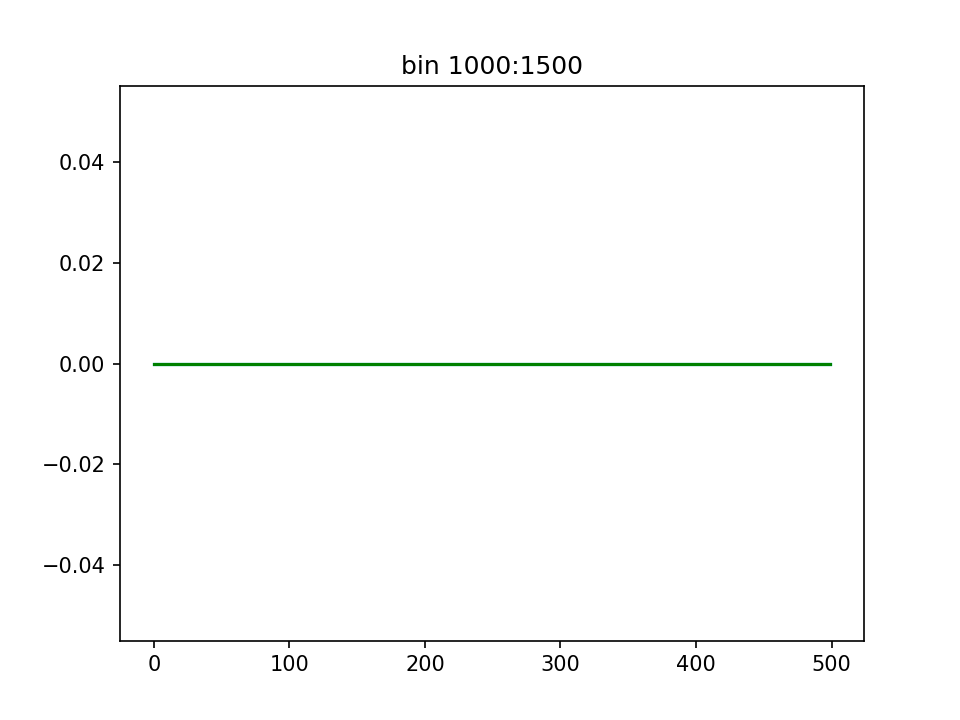

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


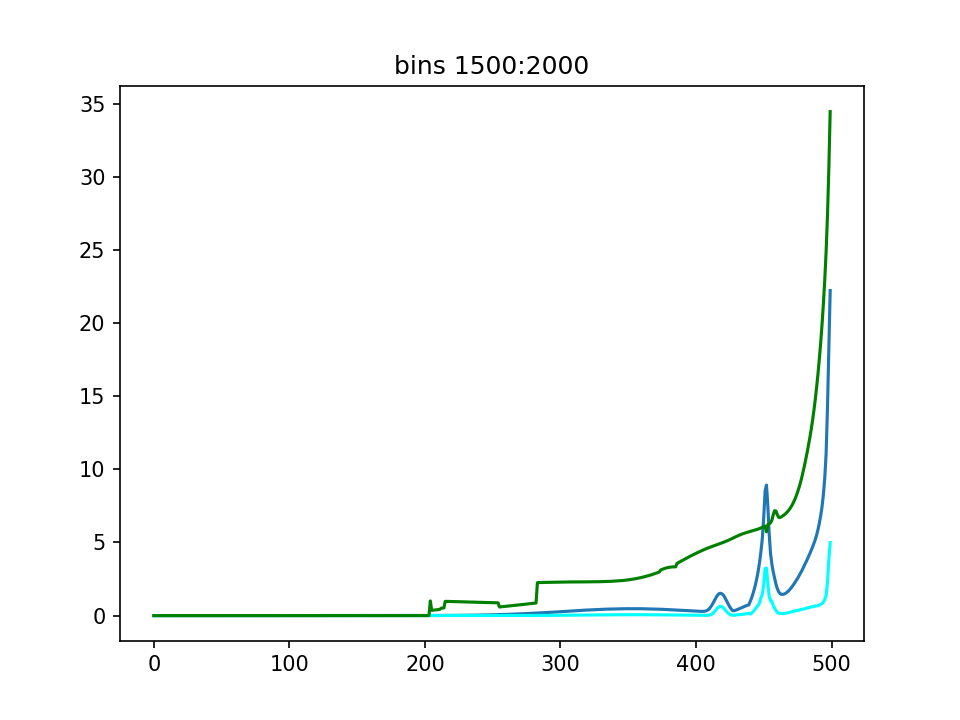

np.max(kde_A) =  8.8828125 np.max(kde_B) =  122.6875 np.max(old_kde) =  45.78125
scaled ratio = 0.582 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


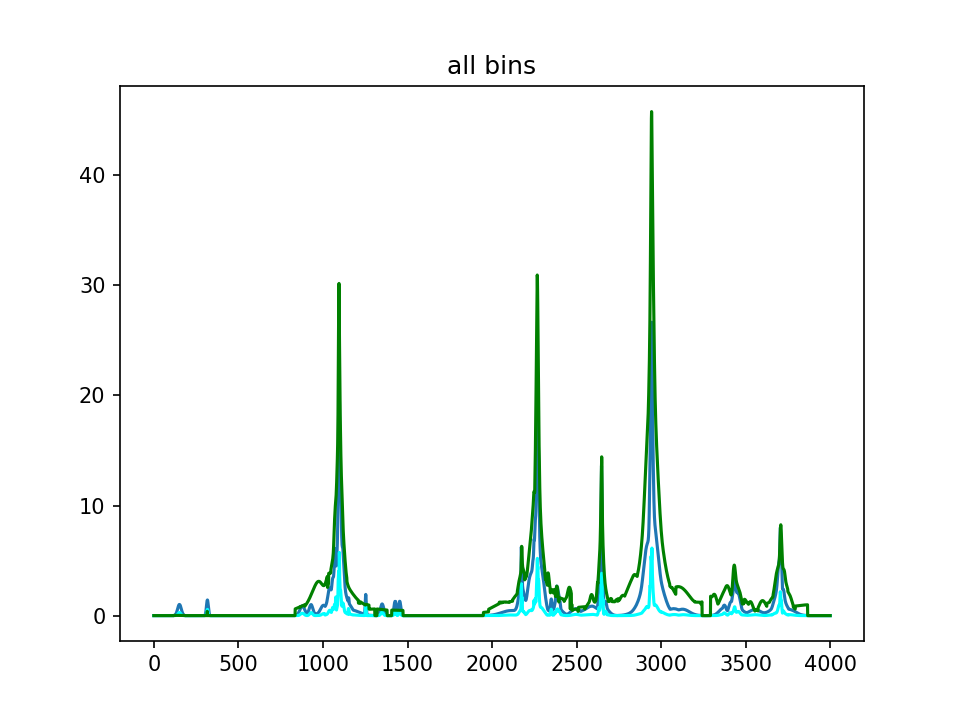

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


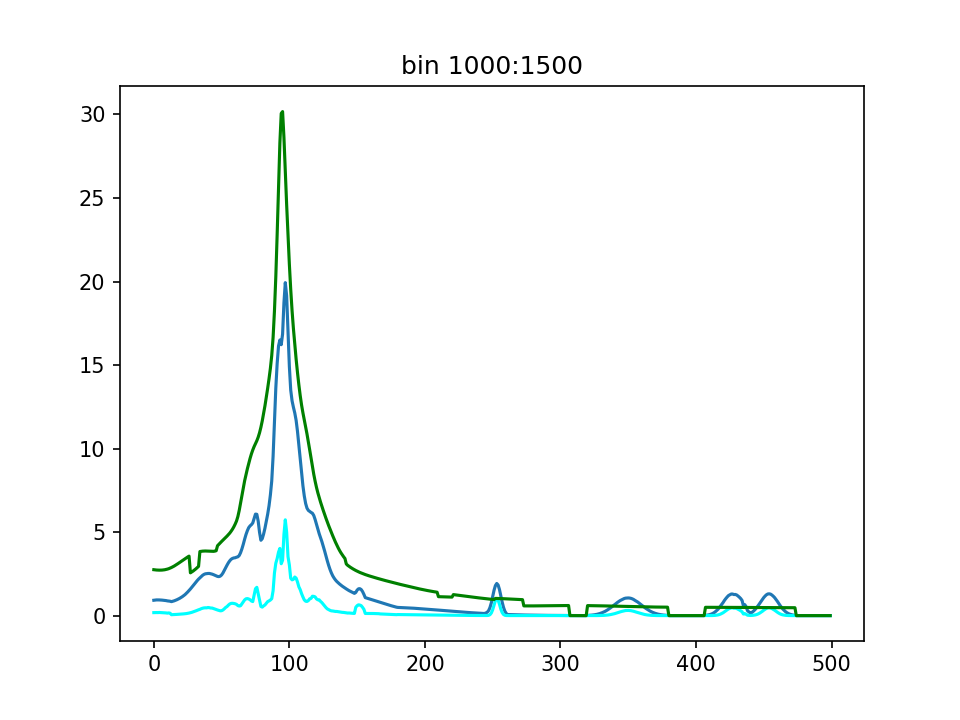

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


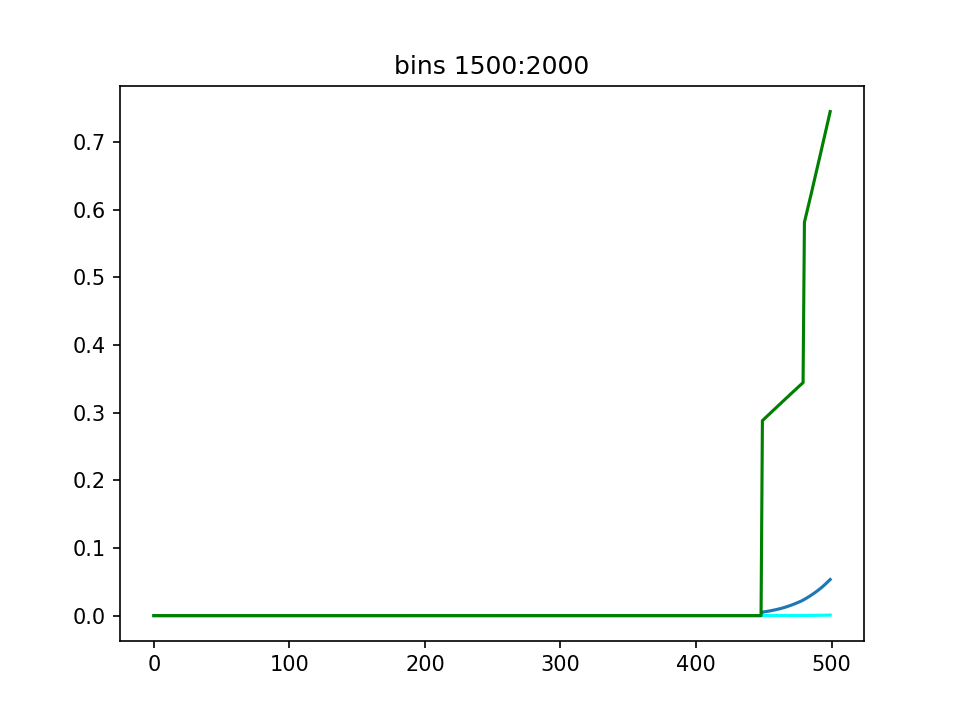

np.max(kde_A) =  15.53125 np.max(kde_B) =  350.25 np.max(old_kde) =  34.46875
scaled ratio = 1.352 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


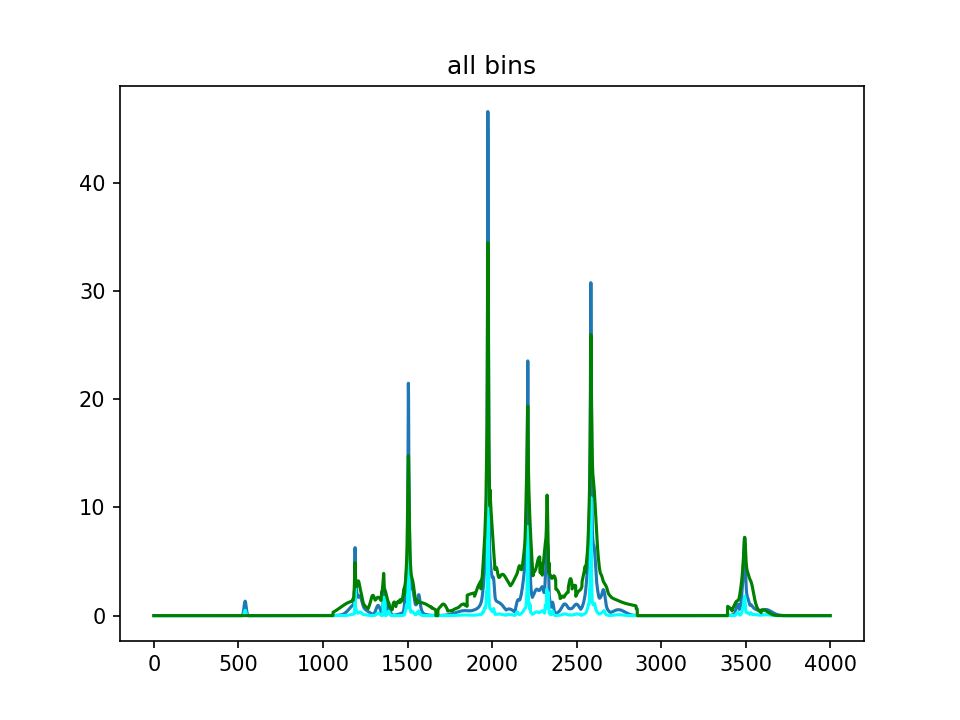

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


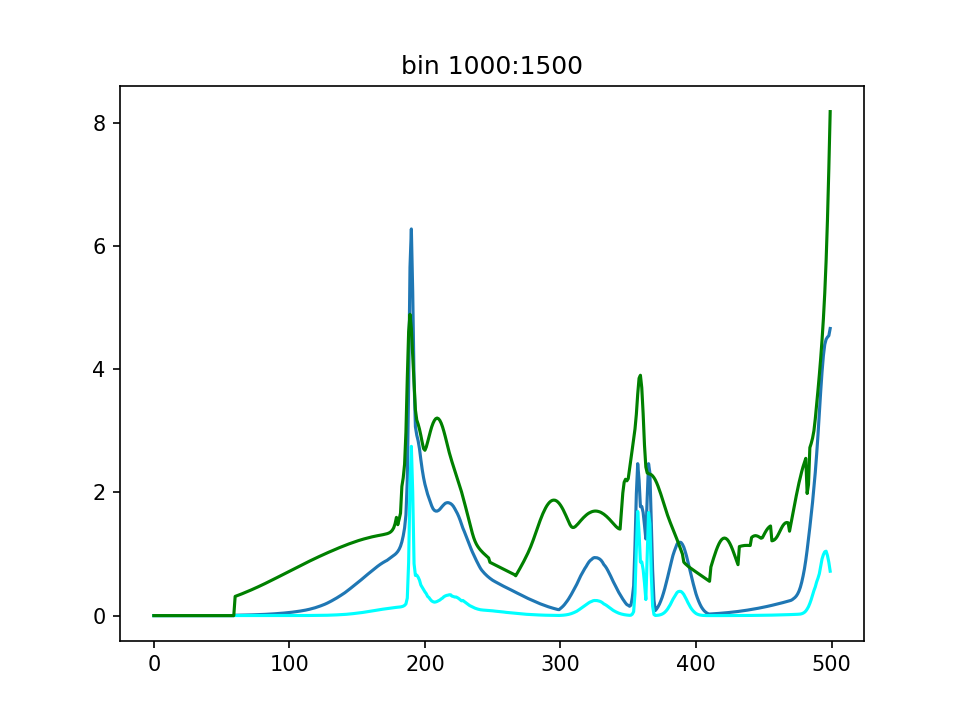

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


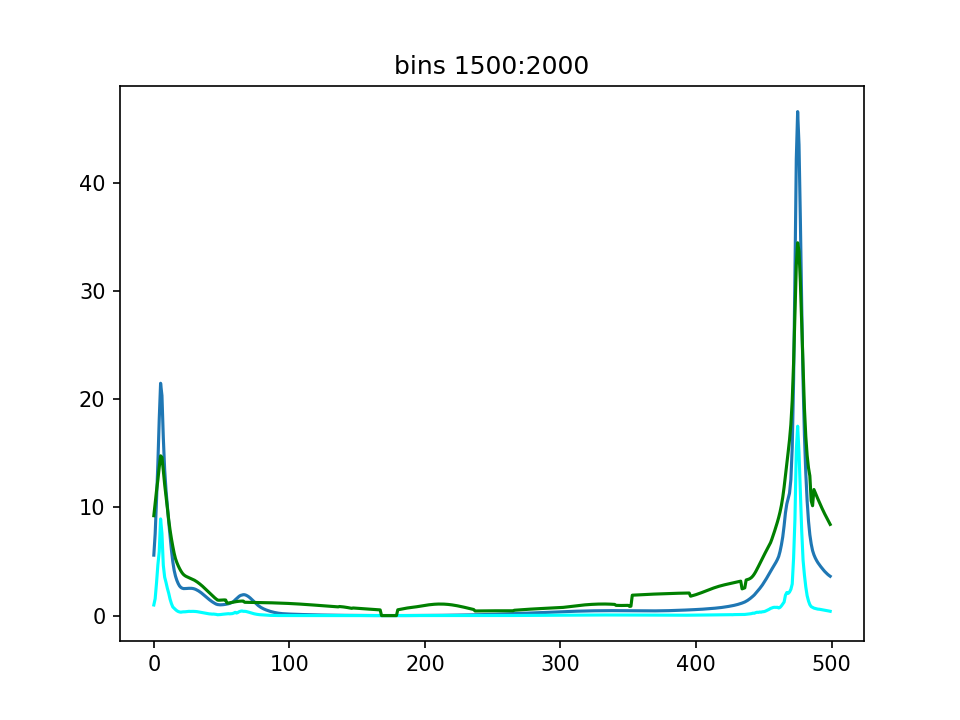

np.max(kde_A) =  15.8671875 np.max(kde_B) =  296.75 np.max(old_kde) =  51.9375
scaled ratio = 0.917 
np.max(kde_A) =  5.234375 np.max(kde_B) =  113.6875 np.max(old_kde) =  13.84375
scaled ratio = 1.134 
np.max(kde_A) =  9.75 np.max(kde_B) =  215.25 np.max(old_kde) =  31.46875
scaled ratio = 0.929 
np.max(kde_A) =  10.046875 np.max(kde_B) =  183.875 np.max(old_kde) =  37.21875
scaled ratio = 0.810 
np.max(kde_A) =  9.765625 np.max(kde_B) =  173.625 np.max(old_kde) =  40.4375
scaled ratio = 0.724 
np.max(kde_A) =  16.109375 np.max(kde_B) =  426.5 np.max(old_kde) =  34.65625
scaled ratio = 1.394 
np.max(kde_A) =  11.09375 np.max(kde_B) =  264.5 np.max(old_kde) =  31.625
scaled ratio = 1.052 
np.max(kde_A) =  15.4453125 np.max(kde_B) =  358.0 np.max(old_kde) =  34.375
scaled ratio = 1.348 
np.max(kde_A) =  11.484375 np.max(kde_B) =  206.875 np.max(old_kde) =  37.875
scaled ratio = 0.910 
np.max(kde_A) =  8.5859375 np.max(kde_B) =  164.125 np.max(old_kde) =  27.234375
scaled ratio = 0.946 


In [8]:
print("X_A,shape = ", X_A.shape)
print("len(X_A) = ",len(X_A))
for i in range(len(X_A)):
  kde_A = X_A[i,0,:]
  kde_B = X_B[i,0,:]
  old_kde = kernel[i,0,:]
  print("np.max(kde_A) = ",np.max(kde_A), "np.max(kde_B) = ",np.max(kde_B), "np.max(old_kde) = ",np.max(old_kde))
  ratio =  3.*np.max(kde_A)/np.max(old_kde)
  print("scaled ratio = %5.3f " %ratio)  

  if (i<10):
    plt.figure()
    kde_A = 3.*X_A[i,0,:]
    kde_B = 0.05*X_B[i,0,:]
    old_kde = kernel[i,0,:]
    plt.plot(kde_A)
    plt.plot(kde_B,color="cyan")
    plt.plot(old_kde,color="g")
    plt.title("all bins")
    plt.show()


    plt.figure()
    kde_A = 3.*X_A[i,0,1000:1500]
    kde_B = 0.05*X_B[i,0,1000:1500]
    old_kde = kernel[i,0,1000:1500]
    plt.plot(kde_A)
    plt.plot(kde_B,color="cyan")
    plt.plot(old_kde,color="g")
    plt.title("bin 1000:1500")
    plt.show()
    
    plt.figure()
    kde_A = 3.*X_A[i,0,1500:2000]
    kde_B = 0.05*X_B[i,0,1500:2000]
    old_kde = kernel[i,0,1500:2000]
    plt.plot(kde_A)
    plt.plot(kde_B,color="cyan")
    plt.plot(old_kde,color="g")
    plt.title("bins 1500:2000")
    plt.show()
